In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data (1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [4]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.drop('Residence_type',axis=1,inplace=True)

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,166.29,25.600000,formerly smoked,0


In [8]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [9]:
gender = enc.fit_transform(df["gender"])
ever_married = enc.fit_transform(df["ever_married"])
work_type = enc.fit_transform(df["work_type"])
smoking_status = enc.fit_transform(df["smoking_status"])

In [10]:
df['work_type']=work_type
df['ever_married']=ever_married
df['smoking_status']=smoking_status
df['gender']=gender

In [11]:
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
5100,1,82.0,1,0,1,3,71.97,28.300000,2,0
5101,0,45.0,0,0,1,2,97.95,24.500000,0,0
5102,0,57.0,0,0,1,2,77.93,21.700000,2,0
5103,0,18.0,0,0,0,2,82.85,46.900000,0,0
5104,0,13.0,0,0,0,4,103.08,18.600000,0,0
5105,0,80.0,1,0,1,2,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,166.29,25.600000,1,0
5109,0,44.0,0,0,1,0,85.28,26.200000,0,0


In [12]:
X = df.drop("stroke",axis=1)

In [13]:
Y = df['stroke']

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,Y_smote = smote.fit_resample(X,Y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_smote,Y_smote,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [17]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100,bootstrap=True)

In [54]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier(max_features='sqrt')

In [55]:
Y_pred = rf.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
Y_test

1145    0
8501    1
3903    0
1608    0
9139    1
       ..
6255    1
1918    0
9530    1
4184    0
5953    1
Name: stroke, Length: 1945, dtype: int64

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

rf_accuracy = accuracy_score(Y_test,Y_pred)
rf_accuracy

0.9516709511568123

In [58]:
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       975
           1       0.93      0.97      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [59]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[907  68]
 [ 26 944]]


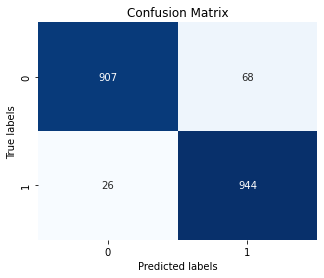

In [60]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Saving the model

In [26]:
import pickle

model_path = 'C:/Users/Lakindu Nethna/Downloads/Documents/DS/Project 2/rf2.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(rf, f)

### Saving the sclaer object

In [27]:
import os
scaler_path = os.path.join('C:/Users/Lakindu Nethna/Downloads/Documents/DS/Project 2/','models/scaler2.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)